# Artificial Intelligence - COMPSCI4004 2024-2025

## Lab 7: Learning from rewards and observations

<font color="red">SOLUTION</font>

----

**Purpose/Learning objectives:**
* Get (initial) hands-on experience with reinforcement learning in which we "examine how an agent can learn from success and failure, from reward and punishment", specifically TD and Q-learning
* Be able to apply basic RL methods to small problems
* Be able to provide suitable evaluations of RL agents

**Guide:** The notebook contains specific tasks you'll need to carry out to make the notebook run. These are indicated with::

* <font color=dark-magenta>TASK:</font> This is a task for you to carry out before proceeding
* <font color=green>CHECKPOINT:</font> This indicates a key point you should understand before proceeding

**Notice:** This notebook is comprehensive and will most likely take you 3-4h to complete; this is expected (a solution will be provided a few days after the lab session).


----

### Q7.1 Introduction & Housekeeping 

This notebook makes use of the implementations in the rl.py module from the AIMA toolbox. We also make use of an implementation of MDPs in the mdp.py module to test our agents (which we looked at last week). 


- <font color=dark-magenta>TASK:</font> Make sure to change the `AIMA_PATH` path below.

In [3]:
AIMA_TOOLBOX_ROOT="C:/Users/Edmond Ho/OneDrive - University of Glasgow/Course/AI/2023-24/aima-python-uofg"

In [4]:
import sys
sys.path.append(AIMA_TOOLBOX_ROOT)
from rl import *
from mdp import sequential_decision_environment
from mdp import value_iteration
import time
%matplotlib inline
import matplotlib.pyplot as plt
print(sys.version)
print("Everything imported correctly (ignore warnings about depreciated version; if you get one)")

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Everything imported correctly (ignore warnings about depreciated version; if you get one)


----

### Q7.2 Review of MDPs & Reinforcement Learning

Before we start looking at the actual RL algorithms let us review a couple of things about RL.

1. Reinforcement Learning is concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. 

2. Reinforcement learning differs from standard supervised learning in that correct input/output pairs are never presented, nor sub-optimal actions explicitly corrected. Further, there is a focus on on-line performance, which involves finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).

In summary we have a sequence of state action transitions with rewards associated with some states. Our goal is to find the optimal policy (pi) which tells us what action to take in each state.

MDP: If the environment is fully observable we often use Markov decision processes to represent the dynamics of the world, actions and states. 

----

### Q7.3 Passive Reinforcement Learning

<font color=dark-magenta>TASK:</font> Define what we mean by passive reinforcement learning ?

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

In passive Reinforcement Learning the agent follows a fixed policy and tries to learn the reward function and the transition model (if it is not aware of that already).

<br>

<div style="border:0.5px solid red"></div>

----

#### Q7.3.1 Passive Temporal Difference Agent in the Grid World

The PassiveTDAgent class in the rl module implements the Agent Program (notice the usage of word Program) described in **Fig 21.4** of the AIMA Book. The algorithm is outlined below:


<img src="./resources/passivetdagent.png" style="width:700px">

- <font color=dark-magenta>TASK:</font> Try to derive the the update rules for the TD agent yourself using simple arguments (see book and  slides). Hint explain the $R(s)+\gamma U(s') - U(s)$ part of the algorithm above. 

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

Consider one observed transition (i.e. ending up in s' after taking action a in state s) and assume that the observed transition happens all the time; then the Bellman equation simplifies to $U(s) = R(s) + \gamma U(s')$ (since $P(s'|s,a)=1$ for the observe/assumed action-transition). Now if the current estimate of $U(s)$ does not obey this equation we try to change it a bit to make it better fit the equation, i.e., minimize the difference $R(s) + \gamma U(s') - U(s)$. However, since we know that taking action a in state s does not always lead to s' (in a stochastic environment), we do not fully trust our assumption and therefore apply only "some of the update" suggested. We do this by simply multiplying a step-size ($\alpha \in ]0,1]$) which could depend on the number of times we have been in that state. 

<br>

<div style="border:0.5px solid red"></div>

---

The TD agent is implemented in the AIMA toolbox in `rl.py` (run the code and it will be loaded into the browser) :

In [5]:
%psource PassiveTDAgent

class PassiveTDAgent:
    """The abstract class for a Passive (non-learning) agent that uses
    temporal differences to learn utility estimates. Override update_state
    method to convert percept to state and reward. The mdp being provided
    should be an instance of a subclass of the MDP Class. [Figure 21.4]

    import sys
    from mdp import sequential_decision_environment
    north = (0, 1)
    south = (0,-1)
    west = (-1, 0)
    east = (1, 0)
    policy = {(0, 2): east, (1, 2): east, (2, 2): east, (3, 2): None, (0, 1): north, (2, 1): north, (3, 1): None, (0, 0): north, (1, 0): west, (2, 0): west, (3, 0): west,}
    agent = PassiveTDAgent(policy, sequential_decision_environment, alpha=lambda n: 60./(59+n))
    for i in range(200):
        run_single_trial(agent,sequential_decision_environment)
    
    agent.U[(0, 0)] > 0.2
    True
    agent.U[(0, 1)] > 0.2
    True
    """

    def __init__(self, pi, mdp, alpha=None):

        self.pi = pi
        self.U = {s: 0. for s in md


- <font color=dark-magenta>TASK:</font> Identify the arguments required to run the TD agent.

----

The Agent Program can be obtained by creating the instance of the class by passing the appropriate parameters which you have identified above. Because of the __ call __ method the object that is created behaves like a callable and returns an appropriate action as most Agent Programs do. To instantiate the object we need a policy(pi) and an mdp whose utility of states will be estimated. Let us import a GridMDP object from the mdp module. **Figure 17.1 (sequential_decision_environment)** is similar to **Figure 21.1**.

In [6]:
sequential_decision_environment
sequential_decision_environment.gamma = 0.99 # note this will make the learning a bit easier

**Figure 17.1 (sequential_decision_environment)** is a GridMDP object and is similar to the grid shown in **Figure 21.1**. The rewards in the terminal states are **+1** and **-1** and **-0.04** in rest of the states. <img src="resources/mdp.png"> 

- <font color=dark-magenta>TASK:</font> Identify the attributes of this environment e.g. by printing the relevant values (e.g. gamma). Hint: it might be useful at this point to remind yourself what actually defines a MDP.

In [7]:
# YOUR CODE HERE
# Insert your code here; you should have at least three lines (with print()) outputting a relevant property

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>


In [8]:
print("reward: %s\n" % sequential_decision_environment.reward)
print("transitions: %s\n" % sequential_decision_environment.transitions)
print("gamma: %s\n" % sequential_decision_environment.gamma)
print("actlist: %s\n" % sequential_decision_environment.actlist)

reward: {(0, 0): -0.04, (0, 1): -0.04, (0, 2): -0.04, (1, 0): -0.04, (1, 2): -0.04, (2, 0): -0.04, (2, 1): -0.04, (2, 2): -0.04, (3, 0): -0.04, (3, 1): -1, (3, 2): 1}

transitions: {(0, 1): {(1, 0): [(0.8, (0, 1)), (0.1, (0, 0)), (0.1, (0, 2))], (0, 1): [(0.8, (0, 2)), (0.1, (0, 1)), (0.1, (0, 1))], (-1, 0): [(0.8, (0, 1)), (0.1, (0, 2)), (0.1, (0, 0))], (0, -1): [(0.8, (0, 0)), (0.1, (0, 1)), (0.1, (0, 1))]}, (1, 2): {(1, 0): [(0.8, (2, 2)), (0.1, (1, 2)), (0.1, (1, 2))], (0, 1): [(0.8, (1, 2)), (0.1, (2, 2)), (0.1, (0, 2))], (-1, 0): [(0.8, (0, 2)), (0.1, (1, 2)), (0.1, (1, 2))], (0, -1): [(0.8, (1, 2)), (0.1, (0, 2)), (0.1, (2, 2))]}, (2, 1): {(1, 0): [(0.8, (3, 1)), (0.1, (2, 0)), (0.1, (2, 2))], (0, 1): [(0.8, (2, 2)), (0.1, (3, 1)), (0.1, (2, 1))], (-1, 0): [(0.8, (2, 1)), (0.1, (2, 2)), (0.1, (2, 0))], (0, -1): [(0.8, (2, 0)), (0.1, (2, 1)), (0.1, (3, 1))]}, (0, 0): {(1, 0): [(0.8, (1, 0)), (0.1, (0, 0)), (0.1, (0, 1))], (0, 1): [(0.8, (0, 1)), (0.1, (1, 0)), (0.1, (0, 0))], (-1

<div style="border:0.5px solid red"></div>

- <font color=dark-magenta>CHECKPOINT:</font> Make sure you see that the reward of state (3,2) is +1

----
Consider the policy defined in Fig 21.1 of the book (with **gamma=1**), i.e.,

<img src="resources/fig21_1.png" width=80%> 

- <font color=dark-magenta>TASK:</font> You should now implement/define this **policy** in a suitable data structure based on the template below) (replace the TODO's with meaning full entries).




In [9]:
# Update the follwing dict with the actual policy (i.e. the actions in each state)

# Action Directions
north = (0, 1)
south = (0,-1)
west  = (-1, 0)
east  = (1, 0)

policy = {
    (0, 2): TODO,  (1, 2): TODO,  (2, 2): TODO,  (3, 2): TODO,
    (0, 1): TODO,                 (2, 1): TODO,  (3, 1): None,
    (0, 0): north, (1, 0): TODO,  (2, 0): TODO,  (3, 0): TODO, 
}

NameError: name 'TODO' is not defined

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

In [10]:
# Action Directions
north = (0, 1)
south = (0,-1)
west  = (-1, 0)
east  = (1, 0)

policy = {
    (0, 2): east,  (1, 2): east,  (2, 2): east,   (3, 2): None,
    (0, 1): north,                (2, 1): north,  (3, 1): None,
    (0, 0): north, (1, 0): west,  (2, 0): west,   (3, 0): west, 
}

Note: you should notice what we mean by a policy and how to define such a policy.

<div style="border:0.5px solid red"></div>

----

#### Q7.3.2 Baseline: Value Iteration

Assuming we know the transition model and rewards, let's solve the problem using value iteration (like in Lab 7) which we know results in the optimal policy.

In [11]:
%psource value_iteration

def value_iteration(mdp, epsilon=0.001):
    """Solving an MDP by value iteration. [Figure 17.4]"""

    U1 = {s: 0 for s in mdp.states}
    R, T, gamma = mdp.R, mdp.T, mdp.gamma
    while True:
        U = U1.copy()
        delta = 0
        for s in mdp.states:
            U1[s] = R(s) + gamma * max(sum(p*U[s1] for (p, s1) in T(s, a))
                                                   for a in mdp.actions(s))
            delta = max(delta, abs(U1[s] - U[s]))
        if delta <= epsilon*(1 - gamma)/gamma:
            return U


In [12]:
U_vi = value_iteration(sequential_decision_environment, epsilon=0.0000000000001)
print(U_vi)

{(0, 1): 0.7166321182834611, (1, 2): 0.8439351067580732, (2, 1): 0.6413273647280517, (0, 0): 0.650663085064067, (3, 1): -1.0, (2, 0): 0.5600723972746914, (3, 0): 0.33804366108940603, (0, 2): 0.7761855541203735, (2, 2): 0.905095903560574, (1, 0): 0.5926747672951874, (3, 2): 1.0}


- NB remember that Python uses zero indexing! We have set $\gamma=0.99$ which to slightly different utilties values than in FIgure 21.1.

----

#### Q7.3.3  (Passive) Learning

We have now got a MDP (sequential_decision_environment), a policy and and a passiv elearning strategy. 

- <font color=dark-magenta>TASK:</font> You should now create an instance of the PassiveTDAgent using the **same alpha** as given in the footnote of the book on **page 837**, i.e. $\alpha(n)=60/(59+n)$. Hint: at this point it might be useful to review what effect $alpha$ has on the TD learning agent.

In [13]:
our_TD_agent = PassiveTDAgent(TODO, TODO, TODO)

NameError: name 'TODO' is not defined

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

In [14]:
our_TD_agent = PassiveTDAgent(policy, sequential_decision_environment, alpha=lambda n: 60./(59+n))
#our_agent = PassiveADPAgent(policy, sequential_decision_environment)

<div style="border:0.5px solid red"></div>

The rl module also has a simple implementation to simulate episode (i.e. the execution of a policy from start until we terminates). The function is called **run_single_trial**. Now we can try our implementation and execute our policy and learn the utilities. 

First, let's have a look at the run_single_trial method:

In [15]:
%psource run_single_trial

def run_single_trial(agent_program, mdp):
    """Execute trial for given agent_program
    and mdp. mdp should be an instance of subclass
    of mdp.MDP """

    def take_single_action(mdp, s, a):
        """
        Select outcome of taking action a
        in state s. Weighted Sampling.
        """
        x = random.uniform(0, 1)
        cumulative_probability = 0.0
        for probability_state in mdp.T(s, a):
            probability, state = probability_state
            cumulative_probability += probability
            if x < cumulative_probability:
                break
        return state

    current_state = mdp.init
    while True:
        current_reward = mdp.R(current_state)
        percept = (current_state, current_reward)
        next_action = agent_program(percept)
        if next_action is None:
            break
        current_state = take_single_action(mdp, current_state, next_action)


- <font color=dark-magenta>TASK/CHECKPOINT:</font> It is very important that you understand what is happening in `run_single_trial` (you can ignore the submethod take_single_action for now) as this is effectively the execution of the agent in the environment. You should create a modified version of `run_single_trial` called `run_single_trial_verbose` that print/traces the important steps so you can see how the agent behaves (percept, next_action and current_state after the action)

In [16]:
# Insert code here

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

In [17]:
def run_single_trial_verbose(agent_program, mdp):
    """Execute trial for given agent_program
    and mdp. mdp should be an instance of subclass
    of mdp.MDP """

    def take_single_action(mdp, s, a):
        """
        Select outcome of taking action a
        in state s. Weighted Sampling.
        """
        x = random.uniform(0, 1)
        cumulative_probability = 0.0
        for probability_state in mdp.T(s, a):
            probability, state = probability_state
            cumulative_probability += probability
            if x < cumulative_probability:
                break
        return state

    current_state = mdp.init
    while True:
        print("---------------")        
        current_reward = mdp.R(current_state)
        percept = (current_state, current_reward)        
        next_action = agent_program(percept)
        if next_action is None:
            break
        current_state = take_single_action(mdp, current_state, next_action)
        
        print(percept)
        print(next_action)
        print(current_state)
        print("---------------")

<div style="border:0.5px solid red"></div>

We can run the agent for one trail/episode as follows:

In [18]:
run_single_trial_verbose(our_TD_agent,sequential_decision_environment)

---------------
((0, 0), -0.04)
(0, 1)
(0, 1)
---------------
---------------
((0, 1), -0.04)
(0, 1)
(0, 2)
---------------
---------------
((0, 2), -0.04)
(1, 0)
(1, 2)
---------------
---------------
((1, 2), -0.04)
(1, 0)
(2, 2)
---------------
---------------
((2, 2), -0.04)
(1, 0)
(3, 2)
---------------
---------------


----

- <font color=dark-magenta>CHECKPOINT:</font> At this point, it should be clear to you that by calling the next_action = agent_program(percept) in the run_single_trial calls the PassiveTDagent `__call__` method which returns an action pi(s) defined by your policy. I.e. executing the agent means takeing an action, observing the outcome and reward, take the action prescribed by the fixed policy (for passive agents)... continue until termination.

#### Q7.3.4 Analysis

- <font color=dark-magenta>TASK:</font> Rerun the `run_single_trial_verbose(our_TD_agent,sequential_decision_environment)` code above five times to observe the sequence states in different /episodes. Does the sequence of actions/states change? Is it supposed to?

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

Yes, it does change and it should given that we know that this is a stochastic environment. E.g. starting in (0,0) and taking the action up can sometimes lead to you going up as intended (8-% of the cases) but also sometimes cause you to go right or stay where you are.

<br>

<div style="border:0.5px solid red"></div>

- <font color=dark-magenta>TASK:</font> Executing the TD agent updates the utilities by follwing the policy in the environment (without knowing the transition model). Now, implement an evalution funciton `compare_utils` that takes the two vetors/arrays with utility. Print out the utility obtained by value and TD learning side by side. Compute the 2-norm and the max norm of the difference between the two set of utilities. Print out the quality measures you have implemented. Use this funciton to examine the difference between the TD utilties and the value iteration method. 

In [19]:
# Insert your code here

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

For convenience, let's first define a general function for comparing and printing utilities (it will be helpful later on):

In [20]:
import numpy as np

def compare_utils(U1, U2, H1="U1     ", H2="U2       "):
    U_diff = dict()
    
    print("%s \t %s \t %s \t %s" % ("State   ",H1,H2,"Diff     "))
    U_2norm = 0.0
    U_maxnorm = -10000
    for state in U1.keys():
        U_diff[state] = U1[state] - U2[state]        
        U_2norm = U_2norm + U_diff[state]**2        
        if np.abs(U_diff[state]) > U_maxnorm:
            U_maxnorm = np.abs(U_diff[state])
        
        print("%s: \t %+.3f \t %+.3f \t %+.5f" % (state,U1[state],U2[state],U_diff[state]))
    
    print("")    
    print("Max norm: %.5f" % (U_maxnorm))     
    print("2-norm : %.5f" % (U_2norm))     
    #return U_diff,U_2norm,U_maxnorm

Ok let's run the agent for a one trial/episode/iteration

In [21]:
our_TD_agent = PassiveTDAgent(policy, sequential_decision_environment, alpha=lambda n: 60./(59+n)) # note we instantiate a new agent to make sure it is reset every time we run something
run_single_trial_verbose(our_TD_agent,sequential_decision_environment)

---------------
((0, 0), -0.04)
(0, 1)
(0, 1)
---------------
---------------
((0, 1), -0.04)
(0, 1)
(0, 1)
---------------
---------------
((0, 1), -0.04)
(0, 1)
(0, 2)
---------------
---------------
((0, 2), -0.04)
(1, 0)
(1, 2)
---------------
---------------
((1, 2), -0.04)
(1, 0)
(2, 2)
---------------
---------------
((2, 2), -0.04)
(1, 0)
(3, 2)
---------------
---------------


Let's compare the different utilities:

In [22]:
compare_utils(U_vi, our_TD_agent.U, 'Value itr','Passive TD')

State    	 Value itr 	 Passive TD 	 Diff     
(0, 1): 	 +0.717 	 -0.080 	 +0.79623
(1, 2): 	 +0.844 	 -0.080 	 +0.92354
(2, 1): 	 +0.641 	 +0.000 	 +0.64133
(0, 0): 	 +0.651 	 -0.080 	 +0.73026
(3, 1): 	 -1.000 	 +0.000 	 -1.00000
(2, 0): 	 +0.560 	 +0.000 	 +0.56007
(3, 0): 	 +0.338 	 +0.000 	 +0.33804
(0, 2): 	 +0.776 	 -0.080 	 +0.85579
(2, 2): 	 +0.905 	 +0.950 	 -0.04490
(1, 0): 	 +0.593 	 +0.000 	 +0.59267
(3, 2): 	 +1.000 	 +1.000 	 +0.00000

Max norm: 1.00000
2-norm : 4.94509


We notice that the values are not the same as the "true" values found by value iteration. This is because the agent only experiences one specific route and does not (unlikely) have all the information about what happens when during certain things in each state.

Also remember that the policy is fixed i.e. with the given policy there is very little chance of getting to e.g. states (2,0) and (3,0). (you could try to change the policy and see how this changes).

<div style="border:0.5px solid red"></div>

----

- <font color=green>CHECKPOINT:</font> At this point, it should be clear to you that executing the agent once in the environment does lead to updated utilities but due to the uncertainty in the environment (the transition model) the actual learning will change when restarting the agent ...

- <font color=dark-magenta>TASK:</font> However, we can restart the agent again with the updated utilities from the the last trail/episode and keep updating them. Create code to run the `run_single_trial` multiple times (and maintain the U values from iteration/episode to iteration/episode). Run you code for 1 and 10 iterations.

In [23]:
# Insert your code here

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

In [24]:
# will instatiate a new agent to make sure the internal attributes are reset (i.e. the utility values etc)
no_of_iterations = 10
our_TD_agent = PassiveTDAgent(policy, sequential_decision_environment, alpha=lambda n: 60./(59+n))
for iteration in range(0,no_of_iterations):
    print("--- restart - iteration %s ---" % iteration )
    print("(2,2) Before: \t %s" % our_TD_agent.U[(2,2)])
    run_single_trial(our_TD_agent, sequential_decision_environment)
    print("(2,2) After : \t %s" % our_TD_agent.U[(2,2)])
    

--- restart - iteration 0 ---
(2,2) Before: 	 0.0
(2,2) After : 	 0.9331213114754097
--- restart - iteration 1 ---
(2,2) Before: 	 0.9331213114754097
(2,2) After : 	 0.9494555261766261
--- restart - iteration 2 ---
(2,2) Before: 	 0.9494555261766261
(2,2) After : 	 0.9499740726750774
--- restart - iteration 3 ---
(2,2) Before: 	 0.9499740726750774
(2,2) After : 	 0.9499983795421922
--- restart - iteration 4 ---
(2,2) Before: 	 0.9499983795421922
(2,2) After : 	 0.8635999886681271
--- restart - iteration 5 ---
(2,2) Before: 	 0.8635999886681271
(2,2) After : 	 0.9409731331444311
--- restart - iteration 6 ---
(2,2) Before: 	 0.9409731331444311
(2,2) After : 	 0.9489380156640507
--- restart - iteration 7 ---
(2,2) Before: 	 0.9489380156640507
(2,2) After : 	 0.9498614803040065
--- restart - iteration 8 ---
(2,2) Before: 	 0.9498614803040065
(2,2) After : 	 0.8132172909056751
--- restart - iteration 9 ---
(2,2) Before: 	 0.8132172909056751
(2,2) After : 	 0.9272028818176125


So after running multiple trials/episodes/iterations let's see if teh utilities are any better than just running one like in the prev question:

In [25]:
compare_utils(U_vi, our_TD_agent.U, 'Value itr','Passive TD2')

State    	 Value itr 	 Passive TD2 	 Diff     
(0, 1): 	 +0.717 	 +0.794 	 -0.07732
(1, 2): 	 +0.844 	 +0.781 	 +0.06328
(2, 1): 	 +0.641 	 +0.025 	 +0.61596
(0, 0): 	 +0.651 	 +0.612 	 +0.03847
(3, 1): 	 -1.000 	 +0.000 	 -1.00000
(2, 0): 	 +0.560 	 +0.000 	 +0.56007
(3, 0): 	 +0.338 	 +0.000 	 +0.33804
(0, 2): 	 +0.776 	 +0.850 	 -0.07402
(2, 2): 	 +0.905 	 +0.927 	 -0.02211
(1, 0): 	 +0.593 	 -0.005 	 +0.59746
(3, 2): 	 +1.000 	 +1.000 	 +0.00000

Max norm: 1.00000
2-norm : 2.18176


- Compared to running the agent only once, we see that the values have now converged somewhat. The passive agent has now visited more of the states (several times), and the utility values have converged to the (approx) correct values. It means the overall error goes down (e.g., the 2-norm goes down) - but the worst case (max norm) might still be quite bad (e.g. 1). However, the policy is fixed, i.e. with the given policy there is very little chance of getting to, e.g. state (2,0) and (3,0). (you could try to change the policy and see how this changes).

<div style="border:0.5px solid red"></div>

----

#### Q7.3.5 Convergence plots 

We can investigate how the estimates of U vary with time (trials/iterations/episodes) by using plots similar to **Fig 21.5a**. To do so we define a function to help us with the same.

In [26]:
def graph_utility_estimates(agent_program, mdp, no_of_iterations, states_to_graph):
    graphs = {state:[] for state in states_to_graph}
    for iteration in range(1,no_of_iterations+1):
        run_single_trial(agent_program, mdp)
        for state in states_to_graph:
            graphs[state].append((iteration, agent_program.U[state]))
    for state, value in graphs.items():
        state_x, state_y = zip(*value)
        plt.plot(state_x, state_y, label=str(state))
    plt.ylim([-1.2,1.2])
    plt.legend(loc='lower right')
    plt.xlabel('Iterations')
    plt.ylabel('U')

Ok, let's run the agent for e.g. 100 trials/iterations....

{(0, 1): 0.7699436078088694, (1, 2): 0.8828137659809493, (2, 1): 0.7707964668142588, (0, 0): 0.7155151896431848, (3, 1): -1, (2, 0): 0.0, (3, 0): 0.0, (0, 2): 0.8275409856107916, (2, 2): 0.9487201935785067, (1, 0): 0.4954315574014595, (3, 2): 1}


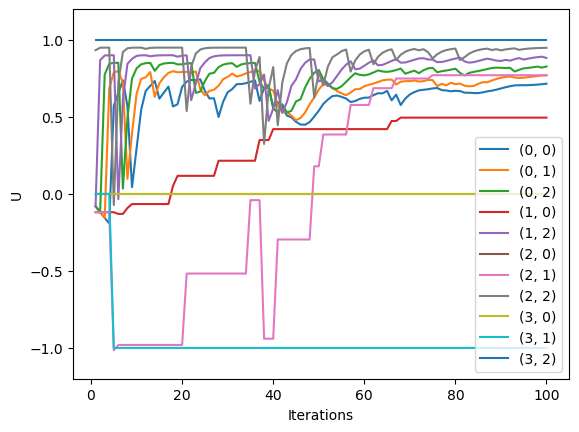

In [27]:
n_iter = 100
agent = PassiveTDAgent(policy, sequential_decision_environment, alpha=lambda n: 60./(59+n))
graph_utility_estimates(agent, sequential_decision_environment, n_iter, [(0,0),(0,1),(0,2),(1,0),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2)])
print(agent.U)

----

#### Q7.3.2 Analysis

- <font color=dark-magenta>TASK:</font> With `n_iter=100` do the utilities converge to the true values found by value iteration (with the true transition model)?


<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

Let's again compare using `compare_utils` function

In [28]:
compare_utils(U_vi, agent.U, 'Value itr','Passive TD')

State    	 Value itr 	 Passive TD 	 Diff     
(0, 1): 	 +0.717 	 +0.770 	 -0.05331
(1, 2): 	 +0.844 	 +0.883 	 -0.03888
(2, 1): 	 +0.641 	 +0.771 	 -0.12947
(0, 0): 	 +0.651 	 +0.716 	 -0.06485
(3, 1): 	 -1.000 	 -1.000 	 +0.00000
(2, 0): 	 +0.560 	 +0.000 	 +0.56007
(3, 0): 	 +0.338 	 +0.000 	 +0.33804
(0, 2): 	 +0.776 	 +0.828 	 -0.05136
(2, 2): 	 +0.905 	 +0.949 	 -0.04362
(1, 0): 	 +0.593 	 +0.495 	 +0.09724
(3, 2): 	 +1.000 	 +1.000 	 +0.00000

Max norm: 0.56007
2-norm : 0.46727


- The observations should be similar to to Q7.3.4. Howver, we have now let the agent observe 100 trials so the values should be closer to the true values in `U_vi` (and the 2-norm lower).

- The values of the terminal state will typically converge quickly since we only need to observe those states exactly once to know its true utility (and it will happend from one iteration to the other).

- Note: if you rerun you might see slighly different behavior due to the randomness in the environment but the overall trend will likely be the same.

<br>

<div style="border:0.5px solid red"></div>


- <font color=dark-magenta>TASK:</font> Change the number of iterations/episodes `n_iter` until you see a clear convergence (how many iterations do you need) ? You should notice that the passive TD takes a long time to converge and may actually still be slightly wrong after 1M iterations (due to the fixed policy).

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

This is a partly open-ended question becaues we havn't defined what convergence means in a strict sense. Howver, it seems that around 100000 trials allows all values to settle.

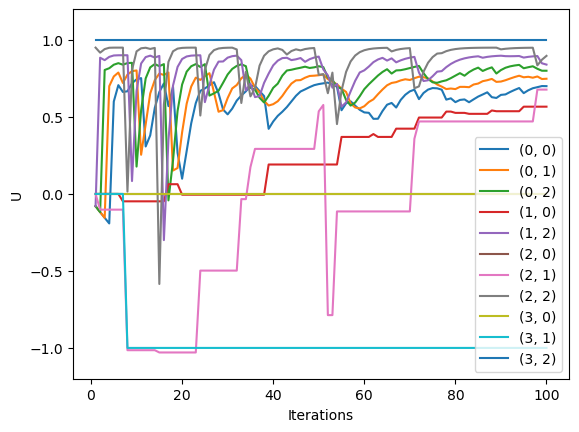

In [29]:
random.seed(1)
n_iter = 100
agent = PassiveTDAgent(policy, sequential_decision_environment, alpha=lambda n: 60./(59+n))
graph_utility_estimates(agent, sequential_decision_environment, n_iter, [(0,0),(0,1),(0,2),(1,0),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2)])


Let's compare the utilities to the ground-truth:

In [30]:
compare_utils(U_vi, agent.U, 'Value itr','TD agent')

State    	 Value itr 	 TD agent 	 Diff     
(0, 1): 	 +0.717 	 +0.748 	 -0.03129
(1, 2): 	 +0.844 	 +0.840 	 +0.00412
(2, 1): 	 +0.641 	 +0.678 	 -0.03619
(0, 0): 	 +0.651 	 +0.700 	 -0.04918
(3, 1): 	 -1.000 	 -1.000 	 +0.00000
(2, 0): 	 +0.560 	 +0.000 	 +0.56007
(3, 0): 	 +0.338 	 +0.000 	 +0.33804
(0, 2): 	 +0.776 	 +0.800 	 -0.02372
(2, 2): 	 +0.905 	 +0.897 	 +0.00859
(1, 0): 	 +0.593 	 +0.567 	 +0.02612
(3, 2): 	 +1.000 	 +1.000 	 +0.00000

Max norm: 0.56007
2-norm : 0.43400


- You will typically see that the 2-norm goes down a bit compared to the 100 iterations. However, the utility for state (2,1) takes a long time to converge because it is a critial state for the agent but rarely visited. State (3,0) will often have zero utility becuase it is almost never visited under the FIXED policy!

<div style="border:0.5px solid red"></div>

----

### Q7.4 Active Reinforcement Learning

<font color="dark-magent">NOTICE:</font> This part is more open ended but you should make sure to go through the same steps as for the TD agent above.

- Unlike Passive Reinforcement Learning considered above, in Active Reinforcement Learning we are not bound by a fixed policy $\pi(s)$ and we need to select our actions. 

- In other words, the agent needs to determine an optimal policy while simultaneously learning the transition model and reward function.

- This is generally a hard problem since the only way the agent can learn something is to gather information, but it also has the desire to obtain the highest reward at any given time.

----

#### Q7.4.1 Active vs passive and exploration vs. exploitation

- <font color=dark-magenta>TASK:</font> What is the difference between passive and active reinforcement learning?


<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

In the passive case, we have a fixed policy and we only need to learn the transition model, and/or $R(s)$ (and potentially $U(s)$ at the same time).

In the active case we also want to learn the policy, $\pi(s)$ which is a much harder task!

<br>

<div style="border:0.5px solid red"></div>


- <font color=dark-magenta>TASK:</font> The fundamental tradeoff the agent needs to face is that of exploration vs. exploitation. Investigate and discuss the implications of 
    1. totally ignoring exploration and only relying on exploitation (will the agent reach the goal and if so when ?) 
    2. totally ignoring exploitation and only relying on exploration (will the agent reach the goal and if so when ?)

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

<br>

Ad 1) Ignoring exploration implies that you trust the (explicit or implicit) transition model at any given point in time. However, if we have only observed what happens after one trial/episode in a stochastic environment the transition model might actually capture the general/average performance in the environment. This often leads to suboptimal policies because the RL agent puts too much emphasis on what it currently knows. We can potentially still reach the goal but it might not be the optimal policy. 
<br>

Ad 2) Ignoring exploitation means that the agent would rely only on random actions. This will lead the agent but there is no planning involved. It can reach the goal by "pure" luck. In a large space it becomes increasingly difficult for the agent to reach the goal by only relying on exploration.

In general we need a suitable compromise between exploiting what we already know (which is typically at least slightly wrong) and learning and improving by exploring the world. Finding optimal ways to make this tradeoff is a difficult theoretical exercise (in the general case) - and making it work in practice is perhaps even harder....

<br>

<div style="border:0.5px solid red"></div>

----

#### Q7.4.3 QLearning Agent

The QLearningAgent class in the `rl.py` module implements the Agent Program described in **Fig 21.8** of the AIMA Book. In Q-Learning the agent learns an action-value function Q which gives the utility of taking a given action in a particular state. 

The Utility **U** of each state is related to **Q** by the following equation : $U (s) = max_a Q(s, a)$

We can easily define a function to convert from a Q table to U values (you can safely ignore for now):

In [31]:
def q_to_u(agent):
    U = defaultdict(lambda: -1000.) 
    for state_action, value in agent.Q.items():
        state, action = state_action
        if U[state] < value:
            U[state] = value            
    return U

Q-Learning does not require an explicit transition model and hence is a model-free method. 

<img src="./resources/qlearner.png" style="width:600px">
(see also https://en.wikipedia.org/wiki/Q-learning)


Recall that $f$ is the so-called exploration function trading-off exploitation (of the current) estimates vs exploring we unsee areas of the state space (see later).

---

Let us look into the source before we see some usage examples.

- Note you do not need to understand this in detail but it will probably help you if you look at the core function namely `__call__` which implements the update equations.

In [32]:
class QLearningAgentUofG:
    """ An exploratory Q-learning agent. It avoids having to learn the transition
        model because the Q-value of a state can be related directly to those of
        its neighbors. [Figure 21.8]

    import sys
    from mdp import sequential_decision_environment
    north = (0, 1)
    south = (0,-1)
    west = (-1, 0)
    east = (1, 0)
    policy = {(0, 2): east, (1, 2): east, (2, 2): east, (3, 2): None, (0, 1): north, (2, 1): north, (3, 1): None, (0, 0): north, (1, 0): west, (2, 0): west, (3, 0): west,}
    q_agent = QLearningAgent(sequential_decision_environment, Ne=5, Rplus=2, alpha=lambda n: 60./(59+n))
    for i in range(200):
        run_single_trial(q_agent,sequential_decision_environment)
    
    """
    def __init__(self, mdp, Ne, Rplus, alpha=None):

        self.gamma = mdp.gamma
        self.terminals = mdp.terminals
        self.all_act = mdp.actlist
        self.Ne = Ne  # iteration limit in exploration function
        self.Rplus = Rplus  # large value to assign before iteration limit
        self.Q = defaultdict(float)
        self.Nsa = defaultdict(float)
        self.s = None
        self.a = None
        self.r = None

        if alpha:
            self.alpha = alpha
        else:
            self.alpha = lambda n: 1./(1+n)  # udacity video

    def f(self, u, n):
        """ Exploration function. Returns fixed Rplus until
        agent has visited state, action a Ne number of times.
        Same as ADP agent in book."""
        if n < self.Ne:
            return self.Rplus
        else:
            return u

    def actions_in_state(self, state):
        """ Return actions possible in given state.
            Useful for max and argmax. """
        if state in self.terminals:
            return [None]
        else:
            return self.all_act

    def __call__(self, percept):
        alpha, gamma, terminals = self.alpha, self.gamma, self.terminals
        Q, Nsa = self.Q, self.Nsa
        actions_in_state = self.actions_in_state

        s, a, r = self.s, self.a, self.r
        s1, r1 = self.update_state(percept) # current state and reward;  s' and r'
        
        #print(s)
        #print(a)
        #print(r)
        #print(s1)
        #print(r1)
        
        if s in terminals: # if prev state was a terminal state it should be updated to the reward
            Q[s, None] = r  
        
        if a is not None: # corrected from the book, we check if the last action was none i.e. no prev state or a terminal state, the book says to check for s
            Nsa[s, a] += 1
            Q[s, a] += alpha(Nsa[s, a]) * (r + gamma * max(Q[s1, a1] for a1 in actions_in_state(s1)) - Q[s, a])
        
        # Update for next iteration
        if s in terminals:
            self.s = self.a = self.r = None
        else:
            self.s, self.r = s1, r1
            self.a = argmax(actions_in_state(s1), key=lambda a1: self.f(Q[s1, a1], Nsa[s1, a1]))
        
        return self.a

    def update_state(self, percept):
        """To be overridden in most cases. The default case
        assumes the percept to be of type (state, reward)."""
        return percept

----

The Agent Program can be obtained by creating the instance of the class by passing the appropriate parameters. Because of the __ call __ method the object that is created behaves like a callable and returns an appropriate action as most Agent Programs do. 

Let us use the same GridMDP object we used above. **Figure 17.1 (sequential_decision_environment)** is similar to **Figure 21.1** but has some discounting as **gamma = 0.9**. The class also implements an exploration function **f** which returns fixed **Rplus** until agent has visited state, action **Ne** number of times. This is the same as the one defined on page **842** of the book. The method **actions_in_state** returns actions possible in given state. It is useful when applying max and argmax operations.

Let us create our object now. We also use the **same alpha** as given in the footnote of the book on **page 837**. We use **Rplus = 2** and **Ne = 5** as defined on page 843. **Fig 21.7**  

In [33]:
q_agent = QLearningAgentUofG(sequential_decision_environment, Ne=5, Rplus=2, 
                         alpha=lambda n: 60./(59+n))

Now to try out the q_agent we make use of the **run_single_trial** function (which was also used above). Let us use **5** iterations/episode to learn the Q values, i.e,

In [34]:
for i in range(5):
    print("Episode/trial %d" % i)
    run_single_trial(q_agent,sequential_decision_environment)    

Episode/trial 0
Episode/trial 1
Episode/trial 2
Episode/trial 3
Episode/trial 4


- <font color=dark-magenta>TASK:</font> Like for the TD agent, use run_single_trial_verbose to output the important details (you can use the same code). Run for 10 iterations.

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

In [35]:
random.seed(1)
q_agent = QLearningAgentUofG(sequential_decision_environment, Ne=5, Rplus=2, 
                         alpha=lambda n: 60./(59+n))
for i in range(10):
    run_single_trial_verbose(q_agent,sequential_decision_environment)    

---------------
((0, 0), -0.04)
(1, 0)
(1, 0)
---------------
---------------
((1, 0), -0.04)
(1, 0)
(1, 0)
---------------
---------------
((1, 0), -0.04)
(1, 0)
(2, 0)
---------------
---------------
((2, 0), -0.04)
(1, 0)
(3, 0)
---------------
---------------
((3, 0), -0.04)
(1, 0)
(3, 0)
---------------
---------------
((3, 0), -0.04)
(1, 0)
(3, 0)
---------------
---------------
((3, 0), -0.04)
(1, 0)
(3, 0)
---------------
---------------
((3, 0), -0.04)
(1, 0)
(3, 0)
---------------
---------------
((3, 0), -0.04)
(1, 0)
(3, 0)
---------------
---------------
((3, 0), -0.04)
(0, 1)
(3, 1)
---------------
---------------
---------------
---------------
((0, 0), -0.04)
(1, 0)
(0, 0)
---------------
---------------
((0, 0), -0.04)
(1, 0)
(1, 0)
---------------
---------------
((1, 0), -0.04)
(1, 0)
(2, 0)
---------------
---------------
((2, 0), -0.04)
(1, 0)
(3, 0)
---------------
---------------
((3, 0), -0.04)
(0, 1)
(3, 1)
---------------
---------------
---------------
------

<div style="border:0.5px solid red"></div>

---------

#### Q7.4.4 Observations

- <font color=dark-magenta>TASK:</font> Rerun the code above to observe the different sequences of states in different trials/episodes, e.g. also modify the number of iterations before outputting a single trace. You can use the `compare_utils` funciton you wrote for TD learning.

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

We can also (as for the TD agent) compute the corresponding utilities in order to compare with the solution found by value iteration

In [36]:
print("Q-learning:")
print(q_to_u(q_agent))
print("------")
print("Value iteration:")
print(U_vi)

Q-learning:
defaultdict(<function q_to_u.<locals>.<lambda> at 0x0000024AEFC96AC0>, {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (3, 1): -1, (2, 1): 0.0, (2, 2): 0.9337704918032786, (3, 2): 1, (0, 1): 0.0, (0, 2): 0.0, (1, 2): 0.0})
------
Value iteration:
{(0, 1): 0.7166321182834611, (1, 2): 0.8439351067580732, (2, 1): 0.6413273647280517, (0, 0): 0.650663085064067, (3, 1): -1.0, (2, 0): 0.5600723972746914, (3, 0): 0.33804366108940603, (0, 2): 0.7761855541203735, (2, 2): 0.905095903560574, (1, 0): 0.5926747672951874, (3, 2): 1.0}


Comparing them directly gives:

In [37]:
compare_utils(U_vi, q_to_u(q_agent), 'Value itr','Q learning')

State    	 Value itr 	 Q learning 	 Diff     
(0, 1): 	 +0.717 	 +0.000 	 +0.71663
(1, 2): 	 +0.844 	 +0.000 	 +0.84394
(2, 1): 	 +0.641 	 +0.000 	 +0.64133
(0, 0): 	 +0.651 	 +0.000 	 +0.65066
(3, 1): 	 -1.000 	 -1.000 	 +0.00000
(2, 0): 	 +0.560 	 +0.000 	 +0.56007
(3, 0): 	 +0.338 	 +0.000 	 +0.33804
(0, 2): 	 +0.776 	 +0.000 	 +0.77619
(2, 2): 	 +0.905 	 +0.934 	 -0.02867
(1, 0): 	 +0.593 	 +0.000 	 +0.59267
(3, 2): 	 +1.000 	 +1.000 	 +0.00000

Max norm: 0.84394
2-norm : 3.44296


- However, if you are using the std settings this would be after 10 iterations so the agent has only restarted 10 times and seen five routes. This is not , so we expect a relatively large error (2-norm). 

<div style="border:0.5px solid red"></div>

----

#### Q7.4.5 Convergence analysis

In order to explore the learning process in individual states, we examine the convergence of the utilities as a function of the the number of trials/iterations

In [38]:
def graph_utility_estimates_q(agent_program, mdp, no_of_iterations, states_to_graph):
    graphs = {state:[] for state in states_to_graph}
    
    for iteration in range(1,no_of_iterations+1):
        run_single_trial(agent_program, mdp)
        
        U = defaultdict(lambda: -1000.)
        for state_action, value in agent_program.Q.items():
            state, action = state_action
            if U[state] < value:
                U[state] = value            

        for state in states_to_graph:            
            graphs[state].append((iteration, U[state]))
    
    for state, value in graphs.items():
        state_x, state_y = zip(*value)
        plt.plot(state_x, state_y, label=str(state))
    
    plt.ylim([-1.2,1.2])
    plt.legend(loc='lower right')
    plt.xlabel('Iterations')
    plt.ylabel('U')

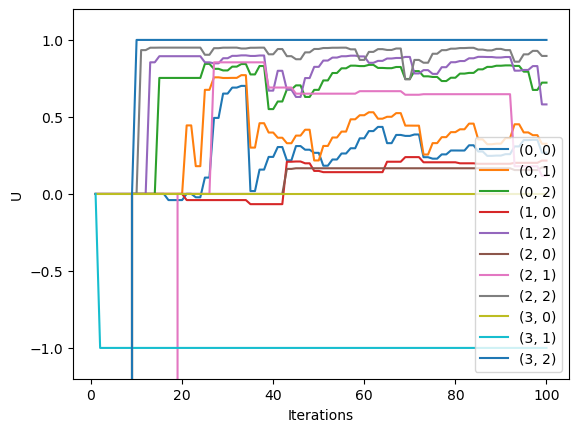

In [39]:
no_of_iters = 100
q_agent = QLearningAgentUofG(sequential_decision_environment, Ne=5, Rplus=2, 
                         alpha=lambda n: 60./(59+n))
graph_utility_estimates_q(q_agent, sequential_decision_environment, no_of_iters, [(0,0),(0,1),(0,2),(1,0),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2)])

#### Q7.4.7 Convergence

- <font color=dark-magenta>TASK:</font> Change `no_of_iters` to e.g. 1000000 and rerun the learning procedure
    - Do the utilities converge to stable values and if so at which point?  
    - Which states are the fastest to converge to a particular value and why (consult the algorithm and go through the process manually)?   
    - You can use the 

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

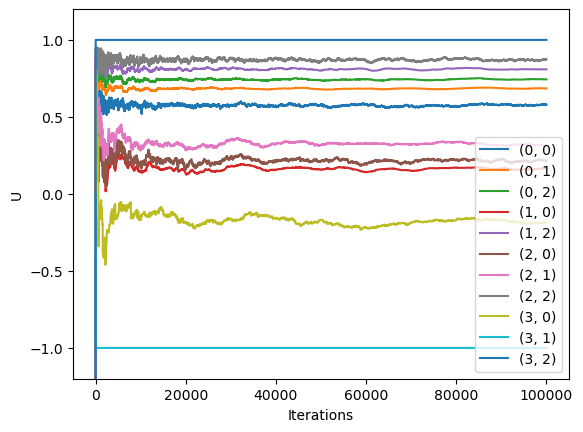

In [40]:
no_of_iters = 100000
q_agent = QLearningAgentUofG(sequential_decision_environment, Ne=5, Rplus=2, 
                         alpha=lambda n: 60./(59+n))
graph_utility_estimates_q(q_agent, sequential_decision_environment, no_of_iters, [(0,0),(0,1),(0,2),(1,0),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2)])

In [41]:
q_agent.Q

defaultdict(float,
            {((0, 0), (1, 0)): -0.07443478260869565,
             ((0, 0), (0, 1)): 0.5800151922072178,
             ((0, 0), (-1, 0)): -0.04,
             ((0, 0), (0, -1)): -0.07959993767469971,
             ((1, 0), (1, 0)): 0.16489291424792432,
             ((1, 0), (0, 1)): -0.04,
             ((1, 0), (-1, 0)): -0.0424749376746997,
             ((1, 0), (0, -1)): -0.0424749376746997,
             ((2, 0), (1, 0)): -0.04,
             ((2, 0), (0, 1)): 0.21326600544264757,
             ((2, 0), (-1, 0)): -0.0007513590502551647,
             ((2, 0), (0, -1)): -0.22837764562309815,
             ((3, 0), (1, 0)): -0.8994134475072202,
             ((3, 0), (0, 1)): -0.9710698704389212,
             ((3, 0), (-1, 0)): -0.9015818478420207,
             ((3, 0), (0, -1)): -0.1884057619270891,
             ((3, 1), None): -1,
             ((0, 1), (1, 0)): -0.04,
             ((0, 1), (0, 1)): 0.6855963486576131,
             ((0, 1), (-1, 0)): 0.5141049946567171,
    

In [42]:
U_q = q_to_u(q_agent)
U_q

defaultdict(<function __main__.q_to_u.<locals>.<lambda>()>,
            {(0, 0): 0.5800151922072178,
             (1, 0): 0.16489291424792432,
             (2, 0): 0.21326600544264757,
             (3, 0): -0.1884057619270891,
             (3, 1): -1,
             (0, 1): 0.6855963486576131,
             (0, 2): 0.7441605846455195,
             (1, 2): 0.809085724887338,
             (2, 2): 0.8749347990890662,
             (3, 2): 1,
             (2, 1): 0.31652649503878727})

In [43]:
compare_utils(U_vi, q_to_u(q_agent), 'Value itr','Q learning')

State    	 Value itr 	 Q learning 	 Diff     
(0, 1): 	 +0.717 	 +0.686 	 +0.03104
(1, 2): 	 +0.844 	 +0.809 	 +0.03485
(2, 1): 	 +0.641 	 +0.317 	 +0.32480
(0, 0): 	 +0.651 	 +0.580 	 +0.07065
(3, 1): 	 -1.000 	 -1.000 	 +0.00000
(2, 0): 	 +0.560 	 +0.213 	 +0.34681
(3, 0): 	 +0.338 	 -0.188 	 +0.52645
(0, 2): 	 +0.776 	 +0.744 	 +0.03202
(2, 2): 	 +0.905 	 +0.875 	 +0.03016
(1, 0): 	 +0.593 	 +0.165 	 +0.42778
(3, 2): 	 +1.000 	 +1.000 	 +0.00000

Max norm: 0.52645
2-norm : 0.69502


<div style="border:0.5px solid red"></div>

----

#### Q7.4.8 Policies

- <font color=dark-magenta>TASK:</font> So far we have only been interested in the utilities and not the actual policies. Consult Lab 7 in order to compute the optimal policy from the learned utilities and compare with the true optimal policy using value iteration (with the correct transition model).

In [44]:
# Insert your code here

<div style="border:0.5px solid red"></div>
<font color="red">SOLUTION</font>

Let's define the functions (from previous labs) that we need to compute the policy from the utilities:

In [45]:
from aimautils import argmax, vector_add, print_table

In [46]:
def expected_utility(a, s, U, mdp):
    "The expected utility of doing a in state s, according to the MDP and U."
    return sum([p * U[s1] for (p, s1) in mdp.T(s, a)])


def best_policy(mdp, U):
    """Given an MDP and a utility function U, determine the best policy,
    as a mapping from state to action. (Equation 17.4)"""
    pi = {}
    for s in mdp.states:
        pi[s] = argmax(mdp.actions(s), key=lambda a: expected_utility(a, s, U, mdp))
    return pi

Run the Q-learning agent:

Gamma 0.99


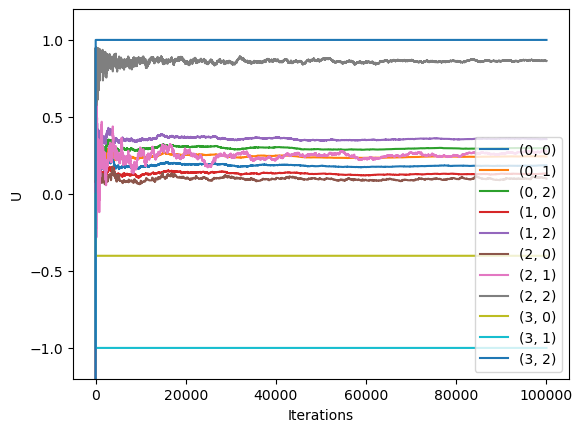

In [47]:
random.seed(1) # we fix this to make sur ethe result are the same if we rerun
no_of_iters = 100000
q_agent = QLearningAgentUofG(sequential_decision_environment, Ne=5, Rplus=2, 
                         alpha=lambda n: 60./(59+n))
graph_utility_estimates_q(q_agent, sequential_decision_environment, no_of_iters, [(0,0),(0,1),(0,2),(1,0),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2)])
print("Gamma %s" % sequential_decision_environment.gamma)

#### Utility Comparison

In [48]:
compare_utils(U_vi, q_to_u(q_agent), 'Value itr','Q learning')

State    	 Value itr 	 Q learning 	 Diff     
(0, 1): 	 +0.717 	 +0.243 	 +0.47319
(1, 2): 	 +0.844 	 +0.356 	 +0.48806
(2, 1): 	 +0.641 	 +0.275 	 +0.36622
(0, 0): 	 +0.651 	 +0.185 	 +0.46590
(3, 1): 	 -1.000 	 -1.000 	 +0.00000
(2, 0): 	 +0.560 	 +0.099 	 +0.46136
(3, 0): 	 +0.338 	 -0.402 	 +0.73974
(0, 2): 	 +0.776 	 +0.297 	 +0.47888
(2, 2): 	 +0.905 	 +0.863 	 +0.04218
(1, 0): 	 +0.593 	 +0.134 	 +0.45912
(3, 2): 	 +1.000 	 +1.000 	 +0.00000

Max norm: 0.73974
2-norm : 2.01527


- Alrigth, there is stil a difference in terms of the utilities (the Q-learning has not fully learned everything there is to know yet, esp. for (3,0)), but what about the policy.....

##### Compute the Q-learning policy:

In [49]:
pi_opt_q = best_policy(sequential_decision_environment, q_to_u(q_agent))
print_table(sequential_decision_environment.to_arrows(pi_opt_q))

>   >      >   .
^   None   ^   .
^   <      ^   <


##### Compute the ground-truth policy:

In [50]:
pi_opt_vi = best_policy(sequential_decision_environment, U_vi)
print_table(sequential_decision_environment.to_arrows(pi_opt_vi))

>   >      >   .
^   None   ^   .
^   <      ^   <


##### Compare policies:

- The policies should be identical if you run the provided solution code/setup (gamma 0.99). This is despite the fact that the utilities have not been perfectly estimated (see AIMA 21.7).
- The grid problem is designed to be challenging so if you change the parameters of the setup slightly you'll see that the policy may change because it becomes more critical to learn the correct utilities or Q-values for certain states (e.g. gamme = 0.9).
- It would be relevant to also compute the policy loss as defined in AIMA.

<div style="border:0.5px solid red"></div>

----